In [1]:
# import tensorflow
import tensorflow as tf
# To plot the image
import matplotlib.pyplot as plt
# to handle the  data structure
import numpy as np

# from tensorflow.keras.models import Model

In [2]:
# Download the MNIST dataset
mnist = tf.keras.datasets.mnist

# Splitting it into training and testing population
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
latent_dim = 64 

class Autoencoder(tf.keras.Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(784, activation='sigmoid'),
      tf.keras.layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [4]:
autoencoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

In [9]:
print(x_train.shape,x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [5]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0239 - val_loss: 0.0091
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0069 - val_loss: 0.0053
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0050 - val_loss: 0.0045
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0045 - val_loss: 0.0043
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.004

In [6]:
autoencoder.encoder.summary()
autoencoder.decoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
Total params: 50,240
Trainable params: 50,240
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               50960     
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 50,960
Trainable params: 50,960
Non-trainable params: 0
_________________________________________________________________


In [7]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
print("Encoded Images:",encoded_imgs.shape)
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
print("Decoded Images:",decoded_imgs.shape)

Encoded Images: (10000, 64)
Decoded Images: (10000, 28, 28)


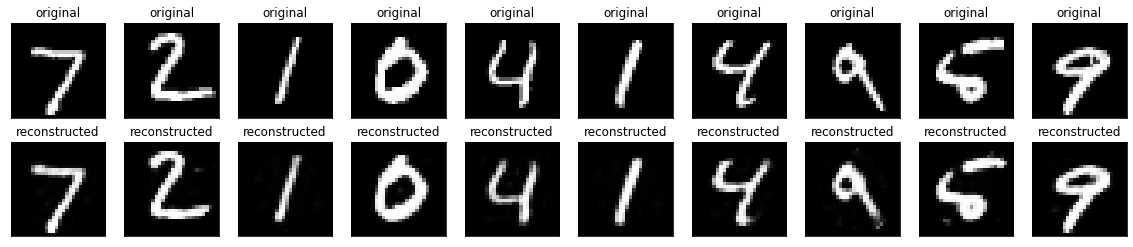

In [8]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()